# Spectral study of a TL tube

We are going to spend time in the analysis of the real signals $u(t)$ and $i(t)$, of a nonlinear load: a TL tube (manipulated TL of the electrotechnics lab).

You have the oscilloscope logging of `uligne`, `utube`, `uballast` and `i`.

We will successively process these signals to:

1. Recover data `t`, `i`, `uligne`, `utube` and `uballast` contained in the file `data_TL.npz`
2. Calculate the most common sampling frequency, $F_s$. (command "mode") and the number of whole periods of the fundamental (50Hz, by hypothesis) present in the data
3. Window the signals on a whole period of the signal. Attention, for the current, it is necessary to remove the offset due to the current sensor (it is necessary to subtract the average value).
4. Calculate and display the RMS values of harmonics from 1 to 50 of `i`, `uligne`, `uballast` and `utube`. The x-axis will be graduated in Hz and the graphs will be bar graphs (separated).

Solution:

2. Fs=25e3
3. Windowing on a complete period
    
    ![](./windowed_signals_one_period.svg)
    
4. Spectrum

    ![](./line_voltage_spectrum.svg)

    ![](./tube_voltage_spectrum.svg)

    ![](./ballast_voltage_spectrum.svg)

    ![](./current_spectrum.svg)

## 1. Getting the data

In [16]:
import numpy as np

content = np.load("data_TL.npz")
list(content.keys())

['t', 'i', 'uligne', 'utube', 'uballast']

In [17]:
t = content['t']
i = content['i']
uligne = content['uligne']
utube = content['utube']
uballast = content['uballast']

## 2. Computing the sampling frequency and the number of entire periods of the signals

In [18]:
def mode(arr):
    values, counts = np.unique(arr, return_counts=True)
    return values[np.argmax(counts)]

Ts = mode(np.diff(t))
Ts

np.float64(3.999999999999837e-05)

In [19]:
Fs = 1 / Ts
Fs

np.float64(25000.00000000102)

In [20]:
N = len(t)
N

1000

In [21]:
Fu = 50                  # Fondamental frequency
Tu = 1 / Fu
N_1 = Tu / Ts            # Number of data needed to get one period of the fundamental sine wave
N_1

np.float64(500.0000000000204)

In [22]:
N_periode = np.floor(N / N_1)
N_periode

np.float64(1.0)

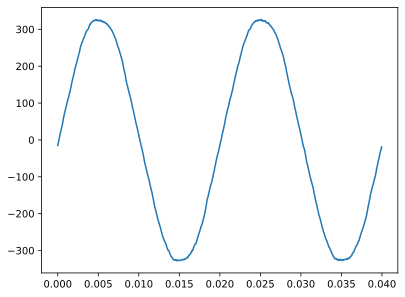

In [23]:
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

plt.plot(t, uligne)
plt.show()

## 3. Windowing on one entire period and deleting the current offset

In [24]:
N = int(Tu/Ts)
N

500

In [25]:
t_1 = t[:N]
u_ligne1 = uligne[:N]
u_tube1 = utube[:N]
u_ballast1 = uballast[:N]
i_1 = i[:N]
i_average = i.mean()      # Computing the current offset
i_average

np.float64(-0.024433795637999994)

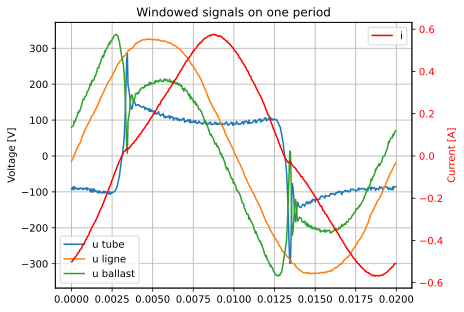

In [26]:
i_1 = i_1 - i_average      # Deleting this offset
 
plt.figure()
plt.grid()
plt.plot(t_1, u_tube1, label="u tube")
plt.plot(t_1, u_ligne1, label="u ligne")
plt.plot(t_1, u_ballast1, label="u ballast")
plt.ylabel("Voltage [V]")
plt.legend(loc="lower left")
plt.twinx()
plt.plot(t_1, i_1, "r", label="i")
plt.ylabel("Current [A]", color="r")
plt.yticks(color='r')
plt.legend(loc="upper right")
plt.title("Windowed signals on one period")
plt.show()

## 4. Harmonic analysis and display of the RMS values of the 50 first harmonics

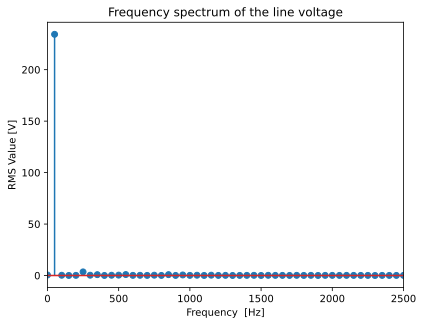

In [27]:
def spectrum(arr):
    N = len(arr)
    X = np.fft.fft(arr)
    X = np.abs(X) / N     # The result is divided by N, the number of samples
    X = X[:N//2+1]        # We keep the upper part of the spectrum
    X[1:] = X[1:] * 2     # We multiply the amplitude by 2, except for the DC component
    return X

def show_50_harmonics_rms(u, Fs, title, ylabel="RMS Value [V]"):
    N = len(u)
    X = spectrum(u)
    
    X = X / np.sqrt(2)        # We want to display the RMS spectrum, not the amplitude ! 
    
    n = np.arange(N//2+1)     # Indexes of the x-axis
    df = Fs / N
    f = n * df                # Frequencies vector for the x-axis

    plt.figure()
    plt.stem(f, X)
    plt.xlim([0, 50 * df])
    plt.title(title)
    plt.xlabel("Frequency  [Hz]")
    plt.ylabel(ylabel)
    plt.show()

# Line Voltage
show_50_harmonics_rms(u_ligne1, Fs, "Frequency spectrum of the line voltage")

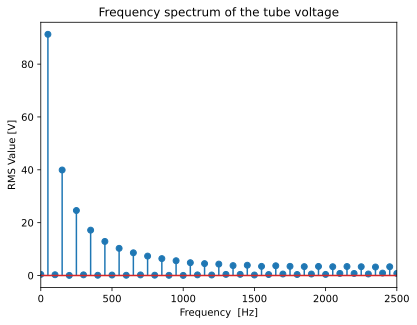

In [28]:
# Tube voltage
show_50_harmonics_rms(u_tube1, Fs, "Frequency spectrum of the tube voltage")

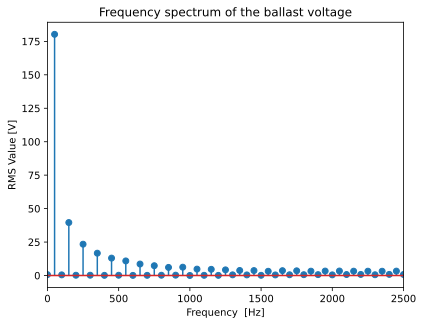

In [29]:
# Ballast voltage
show_50_harmonics_rms(u_ballast1, Fs, "Frequency spectrum of the ballast voltage")

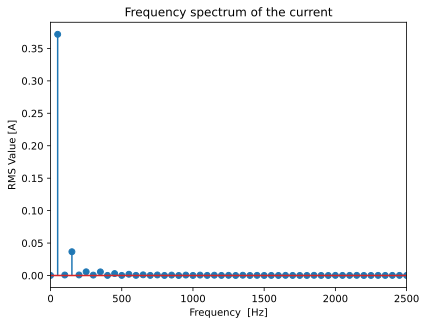

In [30]:
# Current
show_50_harmonics_rms(i_1, Fs, "Frequency spectrum of the current", "RMS Value [A]")